EN2550 Excercise 07

Index No.&nbsp;&nbsp;:&nbsp;190018V

Name&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;Abeywickrama K.C.S.

Github &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;https://github.com/KCSAbeywickrama/EN2550-Excercises

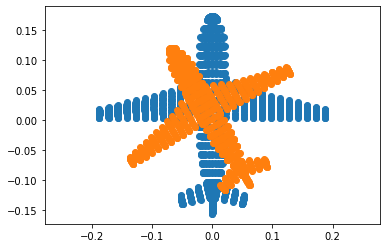

In [2]:
# q1

import numpy as np                                                                                                                        
from plyfile import PlyData, PlyElement # open3d is the standard                                                                            
import matplotlib.pyplot as plt                                                                                                          
pcd = PlyData.read('airplane.ply')                                                                                                
assert pcd is not None                                                                                                                    
points = np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis=0)
points = points - np.mean(points, axis=1).reshape(3,1)    

ones = np.ones((1, points.shape[1]))                     
X = np.concatenate((points, ones), axis=0)               
                                                         
R = np.array([[1, 0, 0],[0, 1, 0], [0, 0, 1]])           
K = np. array ([[1, 0, 0],[0, 1, 0], [0, 0, 1]])         
t = np.array([[0], [0], [-4000]])                        

P1 = K @ np.concatenate((R, t), axis=1)                
                                                        
tilt = 30*np.pi/180

R=np.array([[np.cos(tilt),-np.sin(tilt),0],[np.sin(tilt),np.cos(tilt),0],[0,0,1]])
K=np.array([[0.8,0,0],[0,0.8,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])


P2 = K @ np.concatenate((R, t), axis=1)                 
x1 = P1 @ X                                             
x2 = P2 @ X                                                 
xl = x1/x1[2,:]                                         
x2 = x2/x2[2,:]                                         
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)  
ax.scatter(xl[0,:], xl[1,:])                            
ax.scatter(x2[0,:], x2[1,:])                            
ax.axis('equal')                                        
plt.show()        


Text(0.5, 0, 'z')

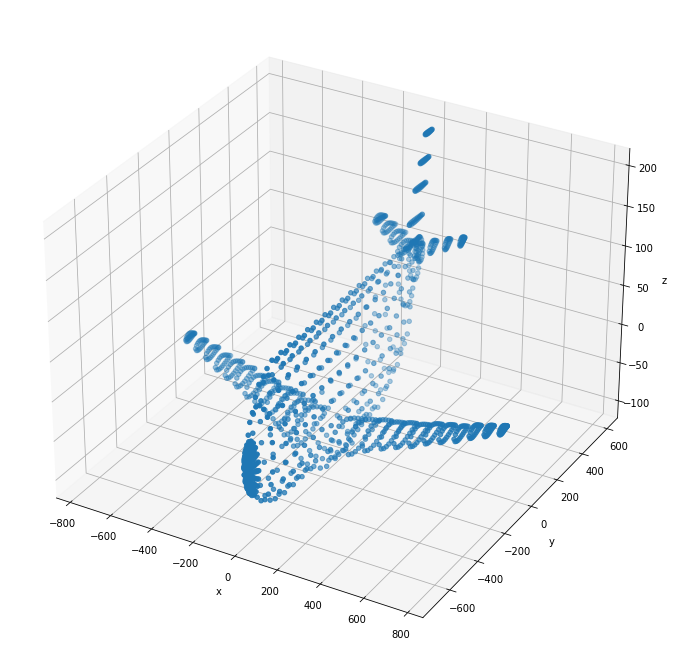

In [6]:
fig = plt.figure(figsize=(12,12))                  
ax = fig.add_subplot(111, projection='3d')         
ax.scatter(points[0, : ], points[1,:], points[2,:])
ax.set_xlabel( 'x')                               
ax.set_ylabel('y')                               
ax.set_zlabel('z')                              


Item  1 , area in pixels = 59143
ltem  1 , area in mmA2 = 2318.642172
Item  2 , area in pixels = 59211
ltem  2 , area in mmA2 = 2321.3080440000003


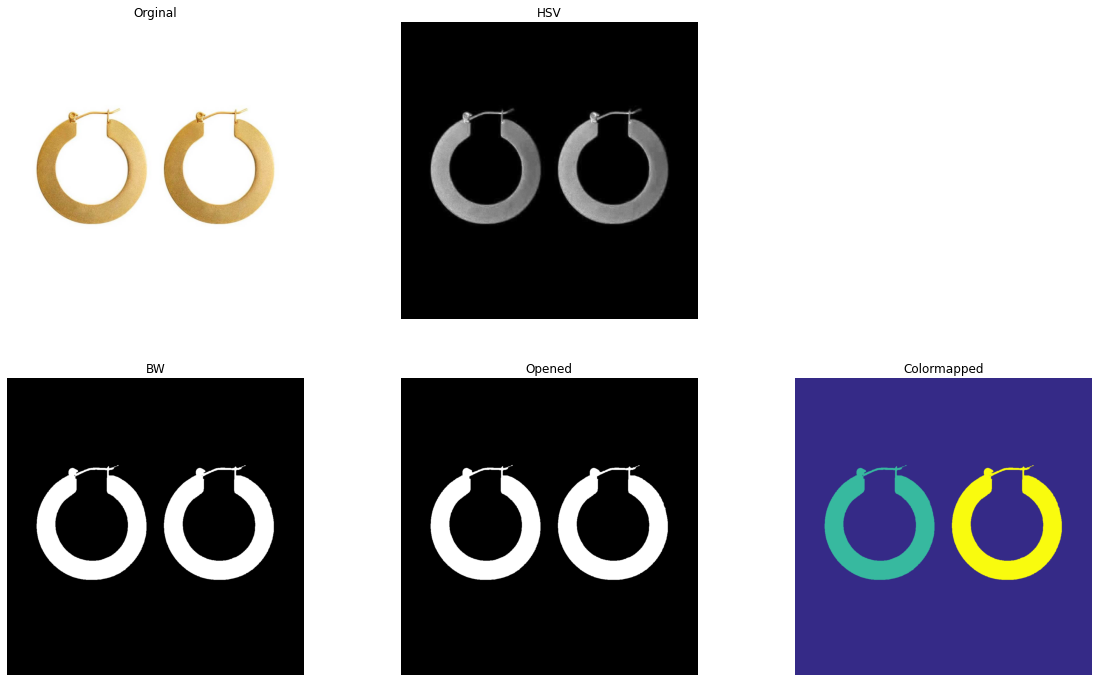

In [4]:
# q3
import cv2 as cv                                                                                          
import numpy as np                                                                                        
                                                                                                          
im = cv.imread(r'earrings.jpg', cv. IMREAD_COLOR)                                                 
assert im is not None                                                                                     
hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)                                                                   
th, bw = cv.threshold(hsv[:,:, 1], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)                               
# Remove dots in the object foregound using closing                                                       
w = 5                                                                                                     
kernel = np.ones((w,w), np.uint8)                                                                         
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)                                                      
                                                                                                           
retval, labels, stats, centroids = cv.connectedComponentsWithStats(bw)                      
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)                     
                                                                                                           
Z = 720 # mm                                                                                               
f = 8 # mm                                                                                                 
for i, s in enumerate(stats):                                                                              
    if i != 0:                                                                                                 
        print('Item ', i, ', area in pixels =', s[4])                                                              
        print('ltem ', i, ', area in mmA2 =', s[4]*(2.2e-3)**2*(Z*Z)/(f*f))                                       


fig,ax=plt.subplots(2,3,figsize=(20,12))
ax[0,0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0,0].set_title("Orginal")

ax[0,1].imshow(cv.cvtColor(hsv[:, :, 1],cv.COLOR_BGR2RGB)) 
ax[0,1].set_title("HSV")

ax[1,0].imshow(cv.cvtColor(bw,cv.COLOR_BGR2RGB))
ax[1,0].set_title("BW")  

ax[1,1].imshow(cv.cvtColor(opened,cv.COLOR_BGR2RGB))
ax[1,1].set_title("Opened")

ax[1,2].imshow(cv.cvtColor(colormapped,cv.COLOR_BGR2RGB)) 
ax[1,2].set_title("Colormapped") 

[axi.set_axis_off() for axi in ax.ravel()]

plt.show()